# Supervised Learning Challenges


Get the [congressional votes data](house-votes-84.csv) in your repo.

These are votes of U.S. House of Representatives Congressmen on 16 key
issues in 1984. You can find more information about it [here](house-votes-84-description.txt).

We will try to see if we can predict the house members' party based on
their votes.   
We will also use some of the general machine learning tools we learned.

#### Challenge 1 `[Python]`
Load the data into a pandas dataframe. Replace `'y'`s with `1`s, `'n'`s with
`0`s.

Now, almost every representative has a `?`. This represents a no vote
(they were absent or some other similar reason). If we dropped all the
rows that had a `?`, we would throw out most of our data. Instead, we
will replace `?` with the _best guess_ (in the Bayesian sense): in the
absence of any other information, we will say that the probability of
the representative saying YES is the ratio of others that said YES
over the whole votes.

So, convert each `?` to this probability (when yes=1 and no=0, this is
the mean of the column)

In [43]:
import pandas as pd
import numpy as np



def get_series_ids(x):
    '''Function returns a pandas series consisting of ids, 
       corresponding to objects in input pandas series x
       Example: 
       get_series_ids(pd.Series(['a','a','b','b','c'])) 
       returns Series([0,0,1,1,2], dtype=int)'''

    values = np.unique(x)
    values2nums = dict(zip(values,range(len(values))))
    return x.replace(values2nums)

def replace_value(seriesVal,toBereplaced):
    mean=np.mean(seriesVal)
    seriesVal.loc[seriesVal>1]=mean
    return seriesVal

housevotes_data=pd.read_csv(r'C:\Users\vlq927\Desktop\BDA\ct16_cap1_ds5\day_06\house-votes-84.csv')

housevotes_data_repalced=housevotes_data.replace(['y', 'n'],  [1, 0]) 

housevotes_data_repalced_1=housevotes_data_repalced.apply(lambda x:get_series_ids(x),axis=0)

housevotes_data_final_stp1=housevotes_data_repalced_1.apply(lambda x:replace_value(x,2),axis=0)



#### Challenge 2 `[Modeling]`
Split the data into a test and training set. Use this
function:

    from sklearn.cross_validation import train_test_split

In [61]:
from sklearn.cross_validation import train_test_split


train, test = train_test_split(housevotes_data_final_stp1, test_size = 0.2)
X_train=train[train.columns[1:]]
Y_train=train[train.columns[0]]
X_test=test[train.columns[1:]]
Y_test=test[train.columns[0]]


#### Challenge 3 `[Modeling]`
Using scikit.learn's KNN algorithm, train a model that predicts the
party (republican/democrat):

    from sklearn.neighbors import KNeighborsClassifier

Read the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). 
Get your X (columns of features) and Y (target column) vectors ready for fitting and evaluating. 
Initiate the model with `knn_model = KNeighborsClassifier(n_neighbors=1)` (for a k=1 KNN). 
Call `.fit(X, Y)` on the `knn_model` with the X and Y from the training set.

Try it with a lot of different k values (number of neighbors), from 1
to 20, and on the test set calculate the accuracy (number of correct
predictions / number of all predictions) for each k

You can use this to calculate accuracy:

    from sklearn.metrics import accuracy_score

Which k value gives the highest accuracy?

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=1)
for i in xrange(1,21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train) 
    y_pred=neigh.predict(X_test)
    print accuracy_score(Y_test, y_pred)





0.954022988506
0.954022988506
0.965517241379
0.977011494253
0.965517241379
0.977011494253
0.954022988506
0.954022988506
0.954022988506
0.954022988506
0.954022988506
0.954022988506
0.954022988506
0.954022988506
0.954022988506
0.954022988506
0.954022988506
0.954022988506
0.954022988506
0.954022988506


#### Challenge 4 `[Modeling]`
Make a similar model but with scikit.learn's `LogisticRegression` instead. Calculate
test accuracy. Google the documentation. The fit / predict interface is the same for all models in scikit.learn

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

logreg = linear_model.LogisticRegression()
logreg.fit(X_train, Y_train) 
y_pred=logreg.predict(X_test)
print accuracy_score(Y_test, y_pred)


0.977011494253


#### Challenge 5 `[Python]`
Make a bar graph of democrats and republicans. How many of each are
there?

Make a very simple predictor that predicts 'democrat' for every
incoming example.   
(Just make a function that takes in an `X`  --an array or matrix with
input examples--, and returns an array of the same length as `X`, where
each value is 'democrat'. For example, if `X` is three rows, your
function should return `['democrat','democrat','democrat']`) Make a
`y_predicted` vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its
accuracy.

ValueError: Can not reset the axes.  You are probably trying to re-use an artist in more than one Axes which is not supported

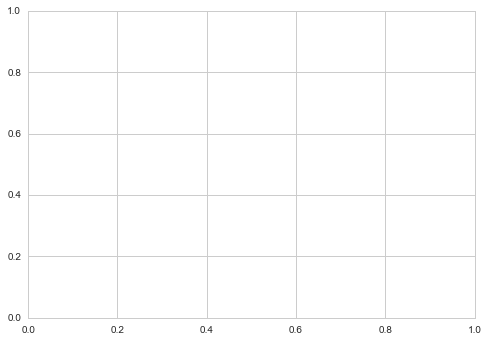

In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
ax.set_title("Amount Frequency")
ax.set_xlabel("Amount ($)")
ax.set_ylabel("Frequency")


rects = ax.patches

# Now make some labels
labels = ["label%d" % i for i in xrange(len(rects))]


height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
sns.countplot(x="republican", data=housevotes_data_final_stp1,axes=ax);

In [ ]:
rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_men,
                 error_kw=error_config,
                 label='Men')

#### Challenge 6 `[Visualization]`
Plot the accuracies of each predictor as a function of k. Since k only matters for KNN,
your logistic regression accuracy, 'democrat' predictor accuracy and
'republican' predictor accuracy will stay the same over all k, so each
of these three will be a horizontal line. But the KNN accuracy will
change with k.

#### Challenge 7 `[Modeling]`
When you found the k value with highest test accuracy in Challenge 3, you used a single test set. 
Use scikit.learn's cross-validation tools to get a range of accuracies for each k. 
Using the average cross validation accuracy, does the best k change? 
Can you imagine cases where it might and might not change?

#### Challenge 8 `[Visualization]`
Like in Challenge 6, make a graph of  accuracies for each k value. 
This time, put error bars in your graph, using your results from Challenge 7.
Use the standard deviation of the cross validation accuracy values for each k as its error bar height (for the KNN predictor).

#### Challenge 9 `[Modeling]`
Calculate the accuracy, precision, recall and f1 scores on the test set for each classifier you built (including the trivial ones).
(Use only one KNN with the best k, no need to do this for all k values).

#### Challenge 10 `[Modeling]`
Calculate the same metrics as in Challenge 9, but use cross validation instead of that test set.

#### Challenge 11a `[Python]`
A Portuguese bank is having a telemrketing campaign. They try to get their clients to subscribe to a term deposit product. Often more than one call to the same client is required. They have been recording their success or failure with each client, along with all the data they have on that client. To cut costs, the bank wants to predict who is likely to subscribe, so they can call those clients and not waste time and money calling people that likely won't subscribe anyway. To that end, [here are their records so far](https://github.com/thisismetis/capitalone-pilottwo/blob/master/project_2/data/bank/bank.csv). You can learn more about each column [here](https://github.com/thisismetis/capitalone-pilottwo/blob/master/project_2/data/bank/bank-description.md).

Build a  classifier with all the numeric features. Calculate the accuracy, precision, and recall for identifying the subscribers.

#### Challenge 11b `[Modeling]`
Is this a good predictor? Which features are contributing the most? Check if any single feature that you included in your model might be driving the classifier. If so, why? Can you use this model successfully? Can you use a model with just that column? Is something wrong? (Hint: You should not use one of the columns, but it is not obvious at initial look. Find out which one and why that might be)

_The rest is completely optional specialization challenges. Select the ones you're excited about, or explore other things you got curious about through the first 11-ish challenges._



-----



#### Extra `[Python]` & `[Modeling]` Challenge A

Instead of 'democrat' or 'republican', can you predict the vote of a
representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that
uses the other votes (do not use the party as a feature) to predict if
the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted,
make their vote 1 if most others voted 1, make it 0 if most others
voted 0).

Calculate the cross validation accuracy of your classifier for
predicting how each representative will vote on the issue.

#### Extra `[Modeling]` Challenge B

Back to your movie data! Choose one categoric feature to predict. 
We mention MPAA Rating in the slides, but genre, month, etc. are all decent choices. If
you don't have any non-numeric features, you can make two bins out of
a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For
example, with Ratings, show how many G, PG, PG-13, R movies there are,
etc. (basically a histogram of your labels).

Predict your outcome variable (target/labels) using KNN and logistic
regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that
is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features
affect the outcome how?

#### Extra`[Modeling]` Challenge C

This is a preview of many other classification algorithms. Scikit.learn has the same interface for all of these, so you
can use them exactly the same way as you did `LogisticRegression` and
`KNeighborsClassifier`. Use each of these to classify your data and
print the test accuracy of each:

Gaussian Naive Bayes

    from sklearn.naive_bayes import GaussianNB


SVM (Support Vector Machine) Classifier

    from sklearn.svm import SVC


Decision Tree

    from sklearn.tree import DecisionTreeClassifier


Random Forest

    from sklearn.ensemble import RandomForestClassifier

#### Extra `[Python]` Challenge D

The representative votes dataset
only had 0s and 1s. Let's just swiftly tackle the breast cancer
surgery data we talked about in class.

The data is [in the repository](haberman.csv). You can learn more about it [here](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival).

- What is the average and standard deviation of the age of all of the
patients?
- What is the average and standard deviation of the age of those
patients that survived 5 or more years after surgery?
- What is the average and standard deviation of the age of those
patients who survived fewer than 5 years after surgery?
- Plot a histogram of the ages side by side with a histogram of the
number of axillary nodes.
- What is the earliest year of surgery in this dataset?
- What is the most recent year of surgery?
- Use logistic regression to predict survival after 5 years. How well
does your model do?
- What are the coefficients of logistic regression? Which features
affect the outcome how?

#### Extra `[Modeling]` & `[Visualization]` Challenge E
For each representatives classifier (KNN and logistic regression), draw the ROC curve and calculate the AUC.
As a `[Visualitation]` track bonus, make the ROC curve look good, following good data visualization principles.